In [42]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

In [43]:
grafo = nx.read_gexf("grafo.gexf")

### Grado
Los `sorted_degrees` son los personajes en orden de aparición en la mayor cantidad de cómics.

In [44]:
degree_dict = dict(grafo.degree())
sorted_degrees = dict(sorted(degree_dict.items(), key=lambda item: item[1], reverse=True))
sorted_degrees

{'X-Men': 52,
 'Cable': 22,
 'Thor': 19,
 'Beast': 18,
 'Captain America': 16,
 'Loki': 16,
 'Magneto': 14,
 'Cyclops': 13,
 'Fantomex': 13,
 'Captain Marvel (Mar-Vell)': 13,
 'Gargoyle (Isaac Christians)': 13,
 'Rictor': 13,
 'Shatterstar': 13,
 'Warpath': 13,
 'Cannonball': 12,
 'X-Force': 12,
 'Domino': 11,
 'Banshee (Theresa Rourke)': 10,
 'Boomer': 10,
 'Beak': 9,
 'Emma Frost': 9,
 'New X-Men': 9,
 'Thing': 9,
 'Absorbing Man': 9,
 'Avengers': 9,
 'Immortus': 9,
 'Odin': 9,
 'Surtur': 9,
 'Iron Man': 8,
 'Fantastic Four': 8,
 'Black Bolt': 8,
 'Captain Britain': 8,
 'Medusa': 8,
 'Uatu The Watcher': 8,
 'Armor (Hisako Ichiki)': 8,
 'Avalanche': 8,
 'Bling!': 8,
 'Firestar': 8,
 'Hydra': 8,
 'Micromax': 8,
 'Penance (Monet St. Croix)': 8,
 'Surge': 8,
 'Jean Grey': 8,
 'X-Statix': 8,
 'Dead Girl': 8,
 'Doctor Strange': 8,
 'Gwen Stacy': 8,
 'Norman Osborn': 8,
 'Union Jack (Joseph Chapman)': 8,
 'Nick Fury (Ultimate)': 7,
 'Ultimates': 7,
 'Wolverine': 7,
 'Avengers (Ultimate)': 6

### Centralidad
#### Centralidad de grado (Degree centrality)
Los `top_nodes` son los 10 nodos más centrales, es decir los nodos que más aristas tienen. En este contexto, son los personajes que aparecen en la mayor cantidad de cómics.

In [45]:
degree_centrality = nx.degree_centrality(grafo)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
top_nodes = sorted_degree_centrality[:10] 
top_nodes

[('X-Men', 0.4193548387096774),
 ('Cable', 0.1774193548387097),
 ('Thor', 0.1532258064516129),
 ('Beast', 0.14516129032258063),
 ('Captain America', 0.12903225806451613),
 ('Loki', 0.12903225806451613),
 ('Magneto', 0.11290322580645161),
 ('Cyclops', 0.10483870967741934),
 ('Fantomex', 0.10483870967741934),
 ('Captain Marvel (Mar-Vell)', 0.10483870967741934)]

#### Centralidad de cercanía (Closeness centrality)
Los `top_closeness` son los nodos que pueden llegar más rápidamente a todos los demás nodos de la red. Representan personajes "accesibles" dentro de la estructura.

In [46]:
closeness_centrality = nx.closeness_centrality(grafo)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
top_closeness = sorted_closeness[:10]
top_closeness

[('X-Men', 0.29937747594793435),
 ('Fantomex', 0.2855985963017951),
 ('Beast', 0.2605269638020192),
 ('Wolverine', 0.25660926509822946),
 ('Magneto', 0.25374745173282165),
 ('Cyclops', 0.2528076463560334),
 ('Beak', 0.2491170237814928),
 ('Emma Frost', 0.2491170237814928),
 ('New X-Men', 0.2491170237814928),
 ('Cable', 0.23296267752945063)]

#### Centralidad de intermediación (Betweenness centrality)
Los `top_betweenness` son los nodos que más frecuentemente aparecen como intermediarios en los caminos más cortos entre pares de nodos. Son "puentes" entre distintas partes de la red.

In [47]:
betweenness_centrality = nx.betweenness_centrality(grafo)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_betweenness = sorted_betweenness[:10]
top_betweenness

[('X-Men', 0.3351857339268826),
 ('Fantomex', 0.26160503540519275),
 ('Wolverine', 0.2513768686073958),
 ('Iron Man', 0.23118279569892472),
 ('Thor', 0.10890375032782584),
 ('Captain America', 0.09080776291633884),
 ('Loki', 0.07854707579333857),
 ('Hulk', 0.046157880933648046),
 ('Spider-Man (Peter Parker)', 0.03540519276160504),
 ('Magneto', 0.029908645860652148)]

#### Centralidad de vector propio (Eigenvector centrality)
Los `top_eigenvector` son los nodos que están conectados con otros nodos que también son importantes. Representan influencia estructural dentro de la red.

In [48]:
eigenvector_centrality = nx.eigenvector_centrality(grafo, max_iter=1000)
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
top_eigenvector = sorted_eigenvector[:10]
top_eigenvector

[('X-Men', 0.45934154897407214),
 ('Cable', 0.2809075783313607),
 ('Beast', 0.2788149893542767),
 ('Warpath', 0.21226768056408252),
 ('Rictor', 0.20837119312879612),
 ('Shatterstar', 0.20837119312879612),
 ('X-Force', 0.20610380644815565),
 ('Cannonball', 0.20610380644815557),
 ('Domino', 0.20367789786084564),
 ('Banshee (Theresa Rourke)', 0.19610078262444)]

### Visualización y comunidades

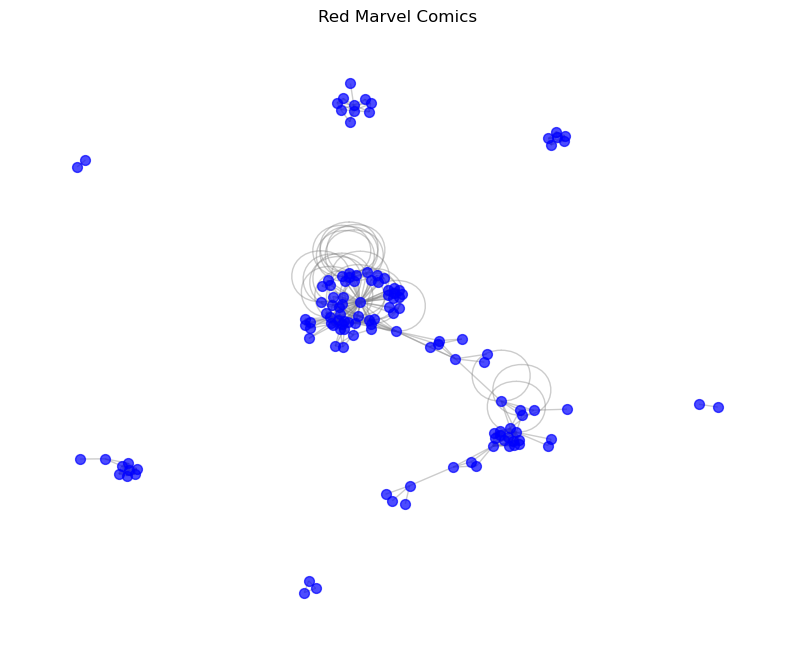

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

pos = nx.spring_layout(grafo, seed=42)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(grafo, pos, node_size=50, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(grafo, pos, edge_color='gray', alpha=0.4)
plt.axis('off')
plt.title("Red Marvel Comics")
plt.show()

/var/folders/f6/1hghhh1x5nq6k8k89mc457j40000gq/T/ipykernel_16549/1066658690.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', num_comunidades)


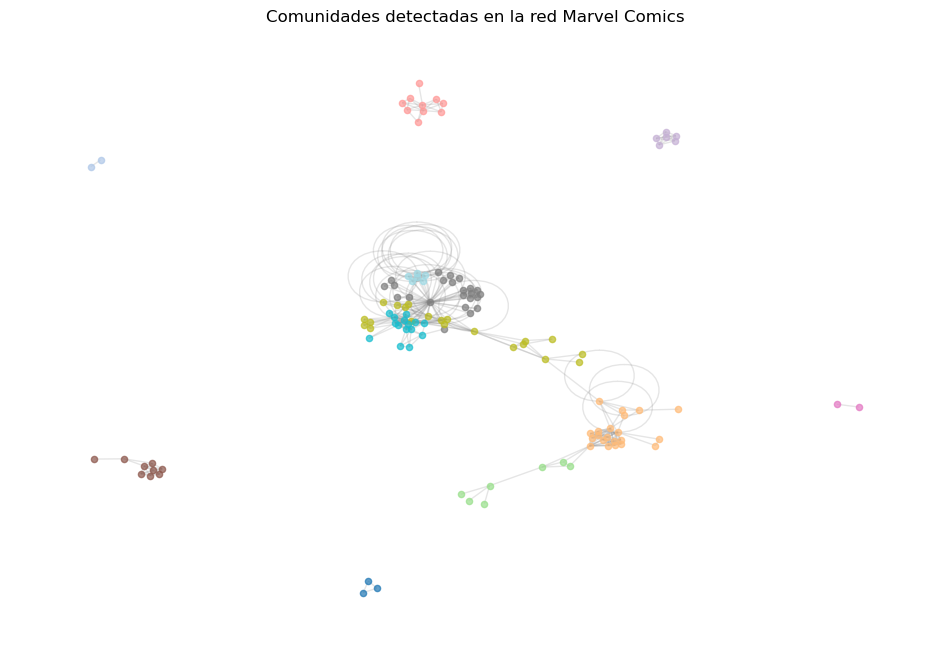

In [50]:
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Detectar comunidades con Louvain
communities_louvain = community.louvain_communities(grafo)
# Número de comunidades detectadas
num_comunidades = len(communities_louvain)
# Posiciones de los nodos en el layout
pos = nx.spring_layout(grafo, seed=42)
# Crear figura
plt.figure(figsize=(12,8))
# Colormap para las comunidades
cmap = plt.cm.get_cmap('tab20', num_comunidades)
# Dibujar nodos por comunidad
for idx, comm_set in enumerate(communities_louvain):
    nx.draw_networkx_nodes(
        grafo,
        pos,
        nodelist=list(comm_set),
        node_color=[cmap(idx)],
        node_size=20,
        alpha=0.7
    )
nx.draw_networkx_edges(grafo, pos, alpha=0.2, edge_color='gray')
plt.axis('off')
plt.title("Comunidades detectadas en la red Marvel Comics")
plt.show()
